# Corona Virus Spread Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Datasets

In [2]:
corona_df = pd.read_csv('./Data/corona_full_data.csv', infer_datetime_format = True)
print(corona_df.shape)
corona_df.head()

(1909, 6)


,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


In [17]:
air_head = ['index', 'airport_name', 'city', 'country', 
           'IATA', 'ICAO', 'latitude', 'longitude',
          'altitude', 'timezone', 'DST', 'tz_database', 
           'type', 'source']

airports_df = pd.read_csv('./Data/airports-extended.dat', 
                          names = air_head, 
                          na_values = "\\N").set_index('index')

drop_cols = ['airport_name', 'ICAO', 'altitude', 'timezone', 
             'DST', 'tz_database', 'source']

airports_df = airports_df.drop(columns = drop_cols)
print(airports_df.shape)
airports_df.head()

(12668, 6)


,city,country,IATA,latitude,longitude,type
index,,,,,,
1,Goroka,Papua New Guinea,GKA,-6.081690,145.391998,airport
2,Madang,Papua New Guinea,MAG,-5.207080,145.789001,airport
3,Mount Hagen,Papua New Guinea,HGU,-5.826790,144.296005,airport
4,Nadzab,Papua New Guinea,LAE,-6.569803,146.725977,airport
5,Port Moresby,Papua New Guinea,POM,-9.443380,147.220001,airport


In [16]:
route_head = ['airline', 'id', 'source_airport', 'source_airport_id', 
              'destination_airport', 'destination_airport_id', 
              'codeshare', 'stops', 'equipment']

air_routes_df = pd.read_csv('./Data/routes.dat', names = route_head)

air_routes_df = air_routes_df[['source_airport', 'destination_airport']]

print(air_routes_df.shape)
air_routes_df.head()

(67663, 2)


,source_airport,destination_airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB


## Explore data

In [11]:
corona_df = corona_df[~corona_df['location'].str.contains('World')]
corona_df.shape

(1859, 6)

In [6]:
total_deaths_country = corona_df.groupby('location')['new_deaths'].sum()

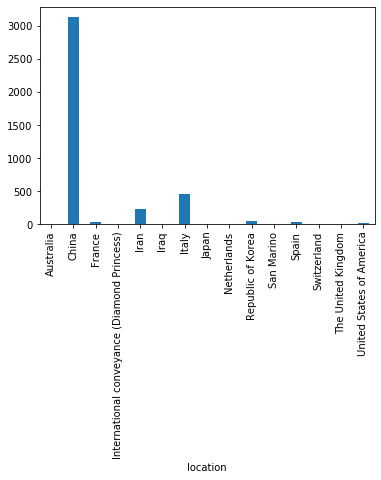

In [7]:
total_deaths_country[total_deaths_country>0].plot.bar()

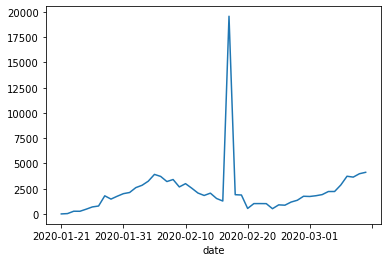

In [21]:
corona_df.groupby('date')['new_cases'].sum().plot()

In [14]:
airports_df[airports_df['country']=='United States']

,airport_name,city,country,IATA,ICAO,latitude,longitude,altitude,timezone,DST,tz_database,type,source
index,,,,,,,,,,,,,
3411,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001,2,-9.0,A,America/Anchorage,airport,OurAirports
3412,Wainwright Air Station,Fort Wainwright,United States,NaN,PAWT,70.613403,-159.860001,35,-9.0,A,America/Anchorage,airport,OurAirports
3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001,16,-9.0,A,America/Anchorage,airport,OurAirports
3414,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005,22,-9.0,A,America/Anchorage,airport,OurAirports
3415,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004,38,-10.0,N,Pacific/Honolulu,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13968,Bus Station,Los Angeles,United States,NaN,NaN,34.033900,-118.235700,285,-8.0,A,NaN,NaN,NaN
13969,Amtrak Station,East Lansing,United States,NaN,NaN,42.718900,-84.495900,856,-5.0,A,NaN,NaN,NaN
13995,UCLA Bus Stop,Los Angeles,United States,NaN,NaN,34.068797,-118.449017,368,-8.0,A,NaN,NaN,NaN
